# Compare different machine learning models

## 1d numerical response

In [1]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

from StatModels import *

In [2]:
# smooth function
def f(x):
    return 2*np.sin(x*np.pi)+3*np.sin(3.2*x*np.pi)+9*x

In [3]:
# disconnected function
def f(x):
    return np.where(x<0.5, 10, 0)

In [4]:
# divergence function
def f(x):
    return np.where(x<0.5, 0.1/(0.52-x)+5, 0.2/(x-0.48))

In [5]:
### generate data

train_x = np.random.random(500)
train_y = f(train_x) + np.random.normal(loc=0, scale=1, size=len(train_x))

test_x = np.linspace(0,1,100, endpoint=True)
test_y = f(test_x) + np.random.normal(loc=0, scale=1, size=len(test_x))

train = data_base(data=train_x, para=train_y)
test = data_base(data=test_x, para=test_y)

In [6]:
model = fit_num(train=train, test=test)

In [7]:
model.method = "simple"
fit_simple = model.predict(test_x.reshape([-1,1])).flatten()
model.method = "randomforest"
fit_rf = model.predict(test_x.reshape([-1,1])).flatten()
model.method = "neuralnetwork1"
fit_nn1 = model.predict(test_x.reshape([-1,1])).flatten()
model.method = "neuralnetwork2"
fit_nn2 = model.predict(test_x.reshape([-1,1])).flatten()

training simple model: Simple Linear Regression ...


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R^2 = 0.56
training Random Forest ...
training Neural Network ...
R^2 = 0.70
training Neural Network ...
R^2 = 0.77


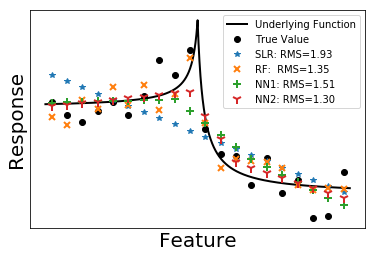

In [8]:
plt.figure()
x = np.linspace(0,1,100000)
plt.plot(x, f(x), 'k-', lw=2, label="Underlying Function")
plt.plot(test_x[2::5], test_y[2::5], 'ko', label="True Value")
plt.plot(test_x[2::5], fit_simple[2::5], '*', label="SLR: RMS={:.2f}".format(root_mean_square(test_y, fit_simple)))
plt.plot(test_x[2::5], fit_rf[2::5], 'x', markeredgewidth=2, markersize=6, \
         label="RF:  RMS={:.2f}".format(root_mean_square(test_y, fit_rf)))
plt.plot(test_x[2::5], fit_nn1[2::5], '+', markeredgewidth=2, markersize=8, \
         label="NN1: RMS={:.2f}".format(root_mean_square(test_y, fit_nn1)))
plt.plot(test_x[2::5], fit_nn2[2::5], '1', markeredgewidth=2, markersize=9, \
         label="NN2: RMS={:.2f}".format(root_mean_square(test_y, fit_nn2)))
plt.legend(loc='best')
plt.xlabel("Feature", fontsize=20)
plt.ylabel("Response", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

## 1d categorical response

In [9]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

from StatModels import *

In [10]:
# sigmoid function
def f(x):
    return 1.0/(1+np.exp(-x))

In [11]:
# non-smooth function
def f(x):
    return np.where(x<0, np.exp(x/6), np.exp(-x/6))

In [12]:
### generate data
train_x = 40*np.random.random(500)-20
train_y = np.random.binomial(1, f(train_x))

test_x = np.linspace(-20,20,100, endpoint=True)
test_y = np.random.binomial(1, f(test_x))

train = data_base(data=train_x, label=train_y)
test = data_base(data=test_x, label=test_y)

In [13]:
model = fit_cat(train=train, test=test)

In [14]:
model.method = "simple"
fit_simple = model.predict(test_x.reshape([-1,1]))
model.method = "randomforest"
fit_rf = model.predict(test_x.reshape([-1,1]))
model.method = "neuralnetwork1"
fit_nn1 = model.predict(test_x.reshape([-1,1]))
model.method = "neuralnetwork2"
fit_nn2 = model.predict(test_x.reshape([-1,1]))

training simple model: Logistic Regression ...
training Random Forest ...
Score: 1.0
training Neural Network ...
Score: 0.802
training Neural Network ...
Score: 0.714


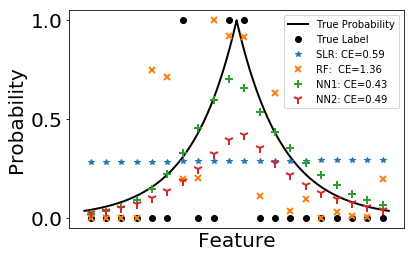

In [15]:
plt.figure()
x = np.linspace(-20,20,100000)
plt.plot(x, f(x), 'k-', lw=2, label="True Probability")
plt.plot(test_x[2::5], test_y[2::5], 'ko', label="True Label")
plt.plot(test_x[2::5], fit_simple[2::5,1], '*', label="SLR: CE={:.2f}".format(cross_entropy(fit_simple, test_y)))
plt.plot(test_x[2::5], fit_rf[2::5,1], 'x', markeredgewidth=2, markersize=6, \
         label="RF:  CE={:.2f}".format(cross_entropy(fit_rf, test_y)))
plt.plot(test_x[2::5], fit_nn1[2::5,1], '+', markeredgewidth=2, markersize=8, \
         label="NN1: CE={:.2f}".format(cross_entropy(fit_nn1, test_y)))
plt.plot(test_x[2::5], fit_nn2[2::5,1], '1', markeredgewidth=2, markersize=9, \
         label="NN2: CE={:.2f}".format(cross_entropy(fit_nn2, test_y)))
plt.legend(loc='best')
plt.xlabel("Feature", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.xticks([])
plt.yticks([0,0.5,1], fontsize=20)
plt.show()

## more than one features, categorical response

Classic Ising model

In [1]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

from Ising_classic import *
from StatModels import *

In [ ]:
temps = np.linspace(4, 0.5, 20, endpoint=True)
states = generate_states(size=[32,32], temperature=temps, boundary_x=1, boundary_y=1, numbers=100) # takes 2 min

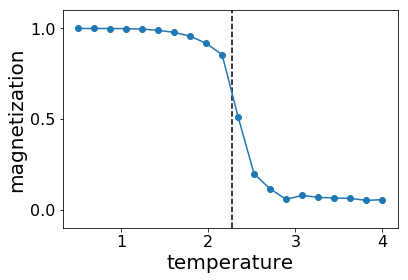

In [18]:
mag = np.mean(np.abs(np.mean(states, axis=1).reshape([-1,100])),axis=1)
Tc = 2./np.log(1+np.sqrt(2))
plt.figure()
plt.plot([Tc,Tc],[-0.1,1.1],'k--')
plt.plot(temps, mag, 'o-')
plt.xlabel("temperature", fontsize=20)
plt.ylabel("magnetization", fontsize=20)
plt.xticks([1,2,3,4], fontsize=16)
plt.yticks([0,0.5,1], fontsize=16)
plt.ylim([-0.1,1.1])
plt.show()

In [19]:
# prepare data
Tc = 2./np.log(1+np.sqrt(2))
np.random.seed()
high_t = 10
low_t = 0.5
# temps1 = np.linspace(high_t, Tc+1, 20, endpoint=True)
# temps2 = np.linspace(Tc-1, low_t, 20, endpoint=True)
temps1 = np.linspace(high_t, 5, 20, endpoint=True)
temps2 = np.linspace(1, low_t, 20, endpoint=True)
temps = np.concatenate([temps1, temps2])
train_x = generate_states(size=[32,32], temperature=temps, boundary_x=1, boundary_y=1, numbers=40) # takes 4 min
print(train_x.shape)
train_t = np.tile(temps.reshape([-1,1]), (1,40)).flatten()
train_y = np.where(train_t<Tc, 1, 0)
train = data_base(data=train_x, para=train_t, label=train_y)

temps = np.linspace(high_t, low_t, 50, endpoint=True)
test_x = generate_states(size=[32,32], temperature=temps, boundary_x=1, boundary_y=1, numbers=2) # takes 4 min
print(test_x.shape)
test_t = np.tile(temps.reshape([-1,1]), (1,2)).flatten()
test_y = np.where(test_t<Tc, 1, 0)
test = data_base(data=test_x, para=test_t, label=test_y)

(1600, 1024)
(100, 1024)


In [20]:
model = fit_cat(train=train, test=test)

In [21]:
model.method = "simple"
fit_simple = model.predict(test_x)
model.method = "randomforest"
fit_rf = model.predict(test_x)
model.method = "neuralnetwork1"
fit_nn1 = model.predict(test_x)
model.method = "neuralnetwork2"
fit_nn2 = model.predict(test_x)

training simple model: Logistic Regression ...
training Random Forest ...
Score: 1.0
training Neural Network ...
Score: 1.0
training Neural Network ...
Score: 1.0


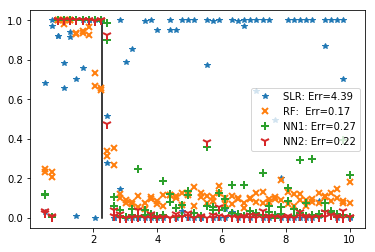

In [22]:
plt.figure()
plt.plot([Tc,Tc],[0,1],'k-')
plt.plot(test_t, fit_simple[:,1], '*', label="SLR: Err={:.2f}".format(cross_entropy(fit_simple, test_y)))
plt.plot(test_t, fit_rf[:,1], 'x', markeredgewidth=2, markersize=6, \
         label="RF:  Err={:.2f}".format(cross_entropy(fit_rf, test_y)))
plt.plot(test_t, fit_nn1[:,1], '+', markeredgewidth=2, markersize=8, \
         label="NN1: Err={:.2f}".format(cross_entropy(fit_nn1, test_y)))
plt.plot(test_t, fit_nn2[:,1], '1', markeredgewidth=2, markersize=9, \
         label="NN2: Err={:.2f}".format(cross_entropy(fit_nn2, test_y)))
plt.legend(loc='best')
plt.show()

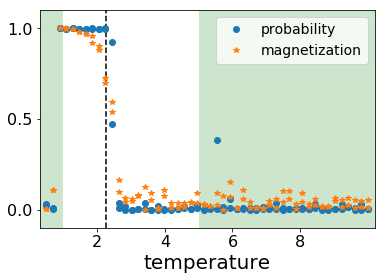

In [23]:
plt.figure()
plt.plot([Tc,Tc],[-0.1,1.1],'k--')
plt.axvspan(np.min(test_t)-0.2, np.max(temps2), facecolor="g", alpha=0.2)
plt.axvspan(np.min(temps1), np.max(test_t)+0.2, facecolor="g", alpha=0.2)
plt.plot(test_t, fit_nn2[:,1], 'o', label="probability")
plt.plot(test_t, np.abs(np.mean(test_x,axis=1)), '*', label="magnetization")
plt.xlabel("temperature", fontsize=20)
# plt.xticks([1,2,3,4], fontsize=16)
plt.xticks([2,4,6,8], fontsize=16)
plt.yticks([0,0.5,1], fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.xlim([np.min(test_t)-0.2, np.max(test_t)+0.2])
plt.ylim([-0.1,1.1])
plt.show()

In [24]:
index = 50
state = test_x[index]
temps = test_t[index]
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
def activation(x):    
    return np.where(x<0, 0, x)

coef = model._nn2_fit.coefs_
bias = model._nn2_fit.intercepts_
state1 = np.dot(state, coef[0]) + bias[0]
state2 = np.dot(activation(state1),coef[1]) + bias[1]
state3 = np.dot(activation(state2),coef[2]) + bias[2]
print("temperature:{:.2f} \nmagnetization:{:.2f} \nsigmoid:{:.2f}".format(temps, np.mean(state),sigmoid(state3)[0]))

temperature:5.15 
magnetization:0.03 
sigmoid:0.00


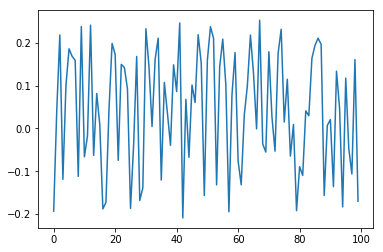

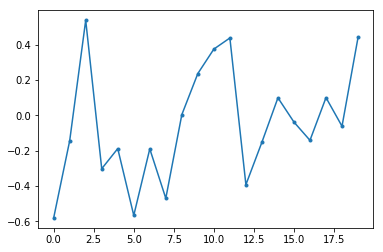

In [25]:
plt.figure()
arg = np.argsort(coef[0][:,0])
# plt.imshow(coef[0][:,10].reshape([32,32])); plt.colorbar()
plt.plot(coef[1][:,6])
plt.figure()
# plt.plot(state1)
plt.plot(coef[2], '.-')
plt.show()

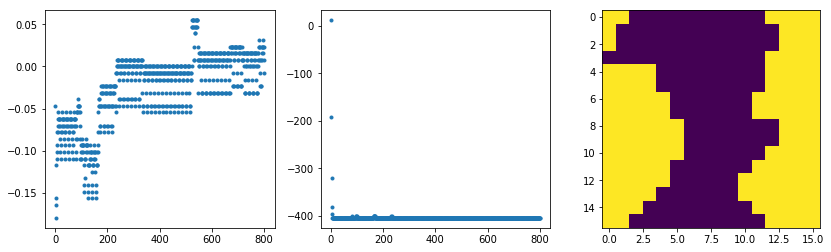

In [26]:
# some states are trapped in a local minimum when T is low
state = 1-2*np.floor(rand([16,16])+0.5)
ferro=1
boundary_x = 1
boundary_y = 1
energy = ferro*state_energy(state, boundary_x, boundary_y)
mag = [np.mean(state)]
ene = [energy]
# generate new states by flip the spins one by one
for _ in range(800):
    energy = update(state, energy, 0.5, boundary_x, boundary_y, ferro)
    mag.append(np.mean(state))
    ene.append(energy)

if abs(energy-ferro*state_energy(state, boundary_x, boundary_y))>1e-6:
    raise ValueError("Error when thermalizing: energy not match")
    
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(np.array(mag),'.')
plt.subplot(1,3,2)
plt.plot(np.array(ene),'.')
plt.subplot(1,3,3)
plt.imshow(state.reshape([16,16]))
plt.show()

## Confusion

In [27]:
import numpy as np
import matplotlib.pylab as plt
from time import time

%matplotlib inline

from Ising_classic import *
from StatModels import *

In [28]:
haveTc = True
method = "neuralnetwork2"

if haveTc:
    temps = np.linspace(1, 5, 50, endpoint=True)
else:
    temps = np.linspace(4, 10, 50, endpoint=True)
start = time()
data = generate_states(size=[32,32], temperature=temps, boundary_x=1, boundary_y=1, numbers=30)
end = time()
print("Time used: {:.2f} min".format((end-start)/60.0))
print(data.shape)

Time used: 4.81 min
(1500, 1024)


In [29]:
Tc_vals = np.linspace(min(temps)+0.1, max(temps)-0.1, 20, endpoint=True)
para = np.transpose(np.tile(temps, [30,1])).flatten()

start0 = time()
start = start0

n = data.shape[0]
select_train = np.random.choice(n, int(n*0.7), replace=False)
select_test = np.delete(np.arange(n), select_train)

acc = []
err = []
for Tc in Tc_vals:
    train = data_base(data=data[select_train,:], label=np.where(para[select_train]<Tc,0,1))
    model = fit_cat(train=train)
    model.method = method
    test_label = model.predict(data[select_test,:], proba=False, verbose=False)
    test_proba = model.predict(data[select_test,:], proba=True, verbose=False)
    acc.append(accuracy(test_label, np.where(para[select_test]<Tc,0,1)))
    err.append(cross_entropy(test_proba, np.where(para[select_test]<Tc,0,1)))
    if time()-start0>30:
        start0 = time()
        print("Critical point {:.2f} with accuracy {:.2f} and error {:.2f}".format(Tc, acc[-1], err[-1]))
print("total time: {:.2f} min".format((time()-start)/60.0) )

total time: 0.28 min


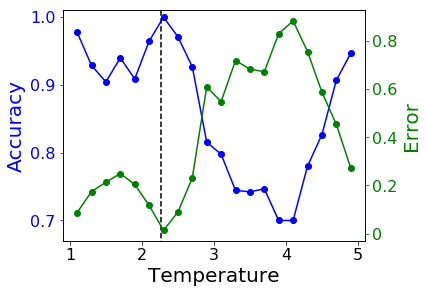

In [30]:
Tc = 2./np.log(1+np.sqrt(2))
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.7,0.8])
ax2 = ax1.twinx()
ax1.plot([Tc,Tc],[0.5,2],'k--')
ax1.plot(Tc_vals, acc, 'bo-')
ax2.plot(Tc_vals, err, 'go-')
ax1.set_ylabel("Accuracy", fontsize=20)
ax2.set_ylabel("Error", fontsize=20)
ax1.set_xlabel("Temperature", fontsize=20)
ax1.tick_params(axis='y', colors="blue")
ax1.yaxis.label.set_color("blue")
ax2.tick_params(axis='y', colors="green")
ax2.yaxis.label.set_color("green")
if haveTc:
    ax1.set_xlim([0.9,5.1])
    ax1.set_xticks([1,2,3,4,5])
    ax1.set_xticklabels([1,2,3,4,5], fontsize=16)
    ax1.set_ylim([0.67,1.01])
    ax1.set_yticks([0.7,0.8,0.9,1.0])
    ax1.set_yticklabels([0.7,0.8,0.9,1.0], fontsize=16)
    ax2.set_yticks([0,0.2,0.4,0.6,0.8])
    ax2.set_yticklabels([0,0.2,0.4,0.6,0.8], fontsize=16)
else:
    ax1.set_xlim([3.9,10.1])
    ax1.set_xticks([4,6,8,10])
    ax1.set_xticklabels([4,6,8,10], fontsize=16)
    ax1.set_ylim([0.4,1.01])
    ax1.set_yticks([0.4,0.7,1.0])
    ax1.set_yticklabels([0.4,0.7,1.0], fontsize=16)
    ax2.set_yticks([0,0.5,1])
    ax2.set_yticklabels([0,0.5,1], fontsize=16)
fig.canvas.draw()

## PCA

In [31]:
import numpy as np
import matplotlib.pylab as plt
from time import time

%matplotlib inline

from Ising_classic import *
from StatModels import *
from MakePlots import *

In [32]:
temps = np.linspace(1.5, 5, 80, endpoint=True)
start = time()
states = generate_states(size=[32,32], temperature=temps, boundary_x=1, boundary_y=1, numbers=20)
end = time()
print("Time used: {:.2f} min".format((end-start)/60.0))
print(states.shape)

Time used: 7.43 min
(1600, 1024)


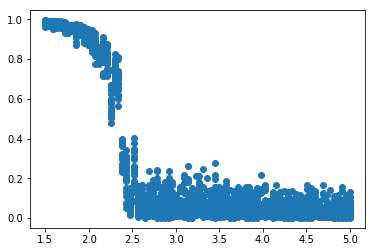

In [33]:
plt.figure()
plt.plot(np.transpose(np.tile(temps, [20,1])).flatten(), np.abs(np.mean(states,axis=1)), 'o')
plt.show()

In [34]:
data = data_base(data=states, para=np.transpose(np.tile(temps, [20,1])).flatten())
model = fit_cat(train=data)
plot = plot_model(model)

training clustering model: K-Means with 3 clusters...


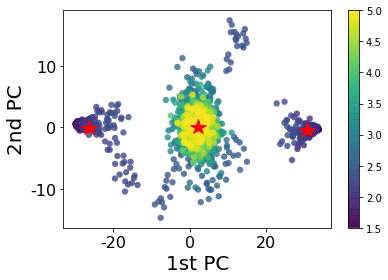

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = plot.kmeans(ax)
ax.set_title("")
ax.set_xlabel("1st PC", fontsize=20)
ax.set_ylabel("2nd PC", fontsize=20)
ax.set_xticks([-20,0,20])
ax.set_xticklabels([-20,0,20], fontsize=16)
ax.set_yticks([-10,0,10])
ax.set_yticklabels([-10,0,10], fontsize=16)
fig.colorbar(im)
fig.canvas.draw()

(1600, 3)


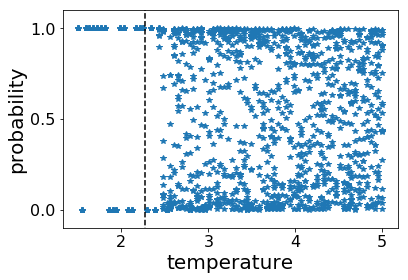

In [36]:
model.method="kmeans"
pred = model.predict(states)
print(pred.shape)

Tc = 2./np.log(1+np.sqrt(2))
plt.figure()
plt.plot(data.para(), pred[:,2], '*')
plt.plot([Tc,Tc],[-1,2],'k--')
plt.xlabel("temperature", fontsize=20)
plt.ylabel("probability", fontsize=20)
plt.xticks([2,3,4,5], fontsize=16)
plt.yticks([0,0.5,1], fontsize=16)
plt.ylim([-0.1,1.1])
fig.canvas.draw()